# 数据准备

In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

C:\Users\admin\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
print('train images     :', mnist.train.images.shape,
      'labels:'           , mnist.train.labels.shape)
print('validation images:', mnist.validation.images.shape,
      ' labels:'          , mnist.validation.labels.shape)
print('test images      :', mnist.test.images.shape,
      'labels:'           , mnist.test.labels.shape)

train images     : (55000, 784) labels: (55000, 10)
validation images: (5000, 784)  labels: (5000, 10)
test images      : (10000, 784) labels: (10000, 10)


# 建立模型

In [3]:
def layer(output_dim,input_dim,inputs, activation=None):#激活函数默认为None
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))#以正态分布的随机数建立并且初始化权重W
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

##### 建立输入层 x 

In [4]:
x = tf.placeholder("float", [None, 784])

##### 建立隐藏层h1

In [6]:
h1=layer(output_dim=1000,input_dim=784,
         inputs=x ,activation=tf.nn.relu)  


##### 建立隐藏层h2

In [8]:
h2=layer(output_dim=1000,input_dim=1000,
         inputs=h1 ,activation=tf.nn.relu)  

##### 建立输出层

In [9]:
y_predict=layer(output_dim=10,input_dim=1000,
                inputs=h2,activation=None)

# 定义训练方式

##### 建立训练数据label真实值 placeholder

In [10]:
y_label = tf.placeholder("float", [None, 10])#训练数据的个数很多所以设置为None

##### 定义loss function

In [12]:
# 深度学习模型的训练中使用交叉熵训练的效果比较好
loss_function = tf.reduce_mean(
                   tf.nn.softmax_cross_entropy_with_logits_v2
                       (logits=y_predict , 
                        labels=y_label))

##### 选择optimizer

In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001) \
                    .minimize(loss_function)
#使用Loss_function来计算误差，并且按照误差更新模型权重与偏差，使误差最小化

# 定义评估模型的准确率

##### 计算每一项数据是否正确预测

In [14]:
correct_prediction = tf.equal(tf.argmax(y_label  , 1),
                              tf.argmax(y_predict, 1))#将one-hot encoding转化为1所在的位数,方便比较

##### 将计算预测正确结果，加总平均

In [15]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 开始训练

In [16]:
trainEpochs = 15#执行15个训练周期
batchSize = 100#每一批的数量为100
totalBatchs = int(mnist.train.num_examples/batchSize)#计算每一个训练周期应该执行的次数
epoch_list=[];accuracy_list=[];loss_list=[];
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [17]:
for epoch in range(trainEpochs):
    #执行15个训练周期
    #每个训练周期执行550批次训练
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)#用该函数批次读取数据
        sess.run(optimizer,feed_dict={x: batch_x,
                                      y_label: batch_y})
        
    #使用验证数据计算准确率
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, #验证数据的features
                                   y_label: mnist.validation.labels})#验证数据的label

    epoch_list.append(epoch)
    loss_list.append(loss);accuracy_list.append(acc)    
    
    print("Train Epoch:", '%02d' % (epoch+1), \
          "Loss=","{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)        

Train Epoch: 01 Loss= 133.117172241  Accuracy= 0.9194
Train Epoch: 02 Loss= 88.949943542  Accuracy= 0.9392
Train Epoch: 03 Loss= 80.701606750  Accuracy= 0.9446
Train Epoch: 04 Loss= 72.045913696  Accuracy= 0.9506
Train Epoch: 05 Loss= 71.911483765  Accuracy= 0.9502
Train Epoch: 06 Loss= 63.642936707  Accuracy= 0.9558
Train Epoch: 07 Loss= 67.192626953  Accuracy= 0.9494
Train Epoch: 08 Loss= 55.959281921  Accuracy= 0.9618
Train Epoch: 09 Loss= 58.867351532  Accuracy= 0.9592
Train Epoch: 10 Loss= 61.904548645  Accuracy= 0.9612
Train Epoch: 11 Loss= 58.283069611  Accuracy= 0.9608
Train Epoch: 12 Loss= 54.332244873  Accuracy= 0.9646
Train Epoch: 13 Loss= 58.152175903  Accuracy= 0.9624
Train Epoch: 14 Loss= 51.552104950  Accuracy= 0.9688
Train Epoch: 15 Loss= 52.803482056  Accuracy= 0.9678
Train Finished takes: 545.0556836128235


##### 画出误差执行结果

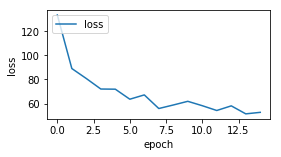

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()#获取当前的figure图
fig.set_size_inches(4,2)#设置图的大小
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

##### 画出准确率执行结果

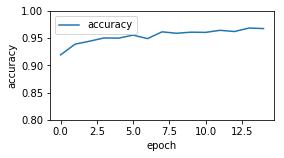

In [19]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

# 评估模型的准确率

In [21]:
print("Accuracy:", sess.run(accuracy,
                           feed_dict={x: mnist.test.images, 
                                      y_label: mnist.test.labels}))

Accuracy: 0.9643


# 进行预测

In [22]:
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={x: mnist.test.images })

In [23]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [24]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        
        ax.imshow(np.reshape(images[idx],(28, 28)), 
                  cmap='binary')
            
        title= "label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

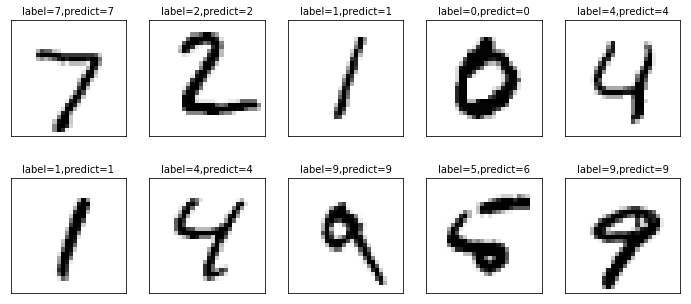

In [25]:
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,0)

In [26]:
y_predict_Onehot=sess.run(y_predict,
                          feed_dict={x: mnist.test.images })

In [27]:
y_predict_Onehot[8]

array([-6185.544  , -5329.589  ,  1897.1707 , -3942.7764 ,   347.9809 ,
        5513.258  ,  6735.7153 , -5088.5273 ,   649.2062 ,    69.50408],
      dtype=float32)

# 找出预测错误

In [28]:
for i in range(400):
    if prediction_result[i]!=np.argmax(mnist.test.labels[i]):
        print("i="+str(i)+"   label=",np.argmax(mnist.test.labels[i]),
              "predict=",prediction_result[i])

i=8   label= 5 predict= 6
i=18   label= 3 predict= 8
i=149   label= 2 predict= 4
i=151   label= 9 predict= 8
i=233   label= 8 predict= 7
i=241   label= 9 predict= 8
i=245   label= 3 predict= 5
i=247   label= 4 predict= 2
i=259   label= 6 predict= 0
i=320   label= 9 predict= 1
i=340   label= 5 predict= 3
i=381   label= 3 predict= 7
i=386   label= 6 predict= 5


In [29]:
sess.close()